In [17]:
import sys
import pandas as pd
import requests
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd 
from sklearn.preprocessing import OneHotEncoder
import random
import math
from collections import defaultdict

# Goals:
### Inital SMART goal: produce a post battle loot generator
***This section will focus on EDA, finding data, making graphics and producing the loot table***
>
***Extract***

* Extract data from the api
* Add all data to a data frame
>
***Visualise***
* Explore data looking for nulls, outliers etc 
* Graph results
>
***Produce Result***
* Finalise a dataframe, save to csv and use in next section
* Create random item generator
* Allow the user to select the rarity of the item
* Allow the user to select the amount of loot aquired


## Extraction of data from API

In [18]:
url = "https://www.dnd5eapi.co/api/2014"


payload = {}
headers = {
  'Accept': 'application/json'
}


response = requests.request("GET", url, headers=headers, data=payload)


print(response.text)

{"ability-scores":"/api/2014/ability-scores","alignments":"/api/2014/alignments","backgrounds":"/api/2014/backgrounds","classes":"/api/2014/classes","conditions":"/api/2014/conditions","damage-types":"/api/2014/damage-types","equipment":"/api/2014/equipment","equipment-categories":"/api/2014/equipment-categories","feats":"/api/2014/feats","features":"/api/2014/features","languages":"/api/2014/languages","magic-items":"/api/2014/magic-items","magic-schools":"/api/2014/magic-schools","monsters":"/api/2014/monsters","proficiencies":"/api/2014/proficiencies","races":"/api/2014/races","rule-sections":"/api/2014/rule-sections","rules":"/api/2014/rules","skills":"/api/2014/skills","spells":"/api/2014/spells","subclasses":"/api/2014/subclasses","subraces":"/api/2014/subraces","traits":"/api/2014/traits","weapon-properties":"/api/2014/weapon-properties"}


In [19]:
url = "https://www.dnd5eapi.co/api/2014/magic-items"


payload = {}
headers = {
  'Accept': 'application/json'
}


response = requests.get(url)
items_json = response.json()



In [20]:
items_json['results']

[{'index': 'adamantine-armor',
  'name': 'Adamantine Armor',
  'url': '/api/2014/magic-items/adamantine-armor'},
 {'index': 'ammunition',
  'name': 'Ammunition, +1, +2, or +3',
  'url': '/api/2014/magic-items/ammunition'},
 {'index': 'ammunition-1',
  'name': 'Ammunition, +1',
  'url': '/api/2014/magic-items/ammunition-1'},
 {'index': 'ammunition-2',
  'name': 'Ammunition, +2',
  'url': '/api/2014/magic-items/ammunition-2'},
 {'index': 'ammunition-3',
  'name': 'Ammunition, +3',
  'url': '/api/2014/magic-items/ammunition-3'},
 {'index': 'amulet-of-health',
  'name': 'Amulet of Health',
  'url': '/api/2014/magic-items/amulet-of-health'},
 {'index': 'amulet-of-proof-against-detection-and-location',
  'name': 'Amulet of Proof against Detection and Location',
  'url': '/api/2014/magic-items/amulet-of-proof-against-detection-and-location'},
 {'index': 'amulet-of-the-planes',
  'name': 'Amulet of the Planes',
  'url': '/api/2014/magic-items/amulet-of-the-planes'},
 {'index': 'animated-shield

In [21]:
url = "https://www.dnd5eapi.co/api/2014/magic-items/amulet-of-the-planes"


payload = {}
headers = {
  'Accept': 'application/json'
}


response = requests.get(url)
items_json = response.json()
items_json

{'index': 'amulet-of-the-planes',
 'name': 'Amulet of the Planes',
 'equipment_category': {'index': 'wondrous-items',
  'name': 'Wondrous Items',
  'url': '/api/2014/equipment-categories/wondrous-items'},
 'rarity': {'name': 'Very Rare'},
 'variants': [],
 'variant': False,
 'desc': ['Wondrous item, very rare (requires attunement)',
  'While wearing this amulet, you can use an action to name a location that you are familiar with on another plane of existence. Then make a DC 15 Intelligence check. On a successful check, you cast the plane shift spell. On a failure, you and each creature and object within 15 feet of you travel to a random destination. Roll a d100. On a 1-60, you travel to a random location on the plane you named. On a 61-100, you travel to a randomly determined plane of existence.'],
 'image': '/api/images/magic-items/amulet-of-the-planes.png',
 'url': '/api/2014/magic-items/amulet-of-the-planes',
 'updated_at': '2025-05-04T02:15:01.647Z'}

In [22]:
def find_all_items(respone_json):
    item_list = []
    
    for item in respone_json['results']:

                current_url = item['url']
                url = f'https://www.dnd5eapi.co/{current_url}'    
                response = requests.get(url)
                item_data = response.json()
    
                details = {'name': item_data['name'],
                'Category': item_data['equipment_category']['name'],
                'rarity': item_data['rarity']['name'],
                'description': item_data['desc'][1],
                'url': item_data['url']}
    
                item_list.append(details)
    
    df = pd.DataFrame(item_list)
    df.to_csv("magic_item_data/magic_items.csv", index=False)
    return df
        
find_all_items(items_json)
        
        

KeyError: 'results'

## Explore data and start visualisation

In [ ]:
def read_item_csv(path):
    df = pd.read_csv(path) 
    return df

df = read_item_csv('magic_items.csv')

In [ ]:
df.head()

,name,Category,rarity,description,url
0,Adamantine Armor,Armor,1,This suit of armor is reinforced with adamanti...,/api/2014/magic-items/adamantine-armor
1,"Ammunition, +1, +2, or +3",Ammunition,5,You have a bonus to attack and damage rolls ma...,/api/2014/magic-items/ammunition
2,"Ammunition, +1",Ammunition,1,You have a +1 bonus to attack and damage rolls...,/api/2014/magic-items/ammunition-1
3,"Ammunition, +2",Ammunition,2,You have a +2 bonus to attack and damage rolls...,/api/2014/magic-items/ammunition-2
4,"Ammunition, +3",Ammunition,3,You have a +3 bonus to attack and damage rolls...,/api/2014/magic-items/ammunition-3


In [ ]:
df.isnull().sum()

name           0
Category       0
rarity         0
description    0
url            0
dtype: int64

## Visualisations

> Distribution of rarity

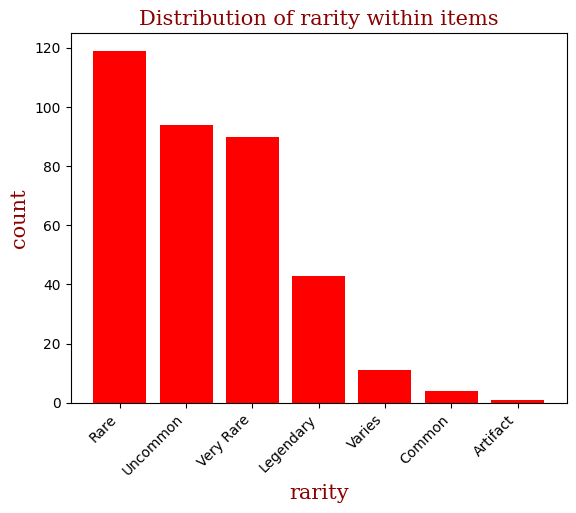

In [ ]:
rarity_df = pd.DataFrame(df['rarity'].value_counts(), columns=['rarity','count'])
rarity_df['rarity'] = rarity_df.index

font = {'family':'serif','color':'darkred','size':15}

plt.bar(rarity_df['rarity'], rarity_df['count'],
        color = 'red',
        )

plt.xlabel('rarity', fontdict = font)
plt.ylabel('count', fontdict = font)
plt.title('Distribution of rarity within items', fontdict= font)
plt.xticks(rotation=45, ha='right')

plt.show()

>distribution of categories

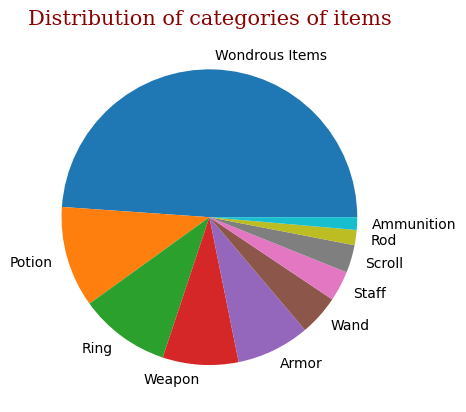

In [ ]:
cat_df = pd.DataFrame(df['Category'].value_counts(), columns=['category','count'])
cat_df['Category'] = cat_df.index

cat_labels = list(cat_df['Category'])
plt.pie(cat_df['count'], labels=cat_labels)
plt.title('Distribution of categories of items', fontdict= font)
plt.show()

In [ ]:
# le_rare = LabelEncoder
# df['rarity'] = le_rare.fit_transform(le_rare, df['rarity'] )
# df['rarity'].value_counts()

In [ ]:
mapping = {'Common': '0',
           'Uncommon': '1',
           'Rare': '2',
           'Very Rare': '3',
           'Legendary': '4',
           'Varies': '5',
           'Artifact':'6',
           '0':'0','1':'1','2':'2','3':'3','4':'4','5':'5','6':'6'}
df['rarity'] = df['rarity'].map(mapping)
df['rarity'].value_counts()

## Using the data to make a useful output
***In this section my aim to use the data to make an app that will allow the user to randomly generate loot from encounters***
* Ask the user for the rarity and type of item wanted
* Randomly select an item within the conditions set out by the user
* output the result

> find item rarity

In [ ]:
def ask_for_rarity(df):
    
    mapping = {'Common': '0',
           'Uncommon': '1',
           'Rare': '2',
           'Very Rare': '3',
           'Legendary': '4',
           'Varies': '5',
           'Artifact':'6',
           '0':'0','1':'1','2':'2','3':'3','4':'4','5':'5','6':'6'}
    df['rarity'] = df['rarity'].map(mapping)

    user_rarity = input('input 0 to 6 for rarity')
    item_df = df[(df['rarity']== user_rarity)]
    item_df = item_df.reset_index(drop=True)
    return item_df

In [ ]:
def random_item(rarity_df, amount):
    output_items = pd.DataFrame(columns=['name', 'Category', 'rarity', 'description','url'])
    if amount == '1':
        rand_amount = rnd.randint(1,3)
    elif amount == '2':
        rand_amount = rnd.randint(3,6)
    elif amount =='3':
        rand_amount = rnd.randint(6,10)
    else:
        sys.exit('invalid amount input')
        

    for x in range((rand_amount)):
        rarity_df['Category'].str.lower()
        random_number = rnd.randint(0, round((rarity_df.size/len(rarity_df.columns)),1))
        output_item = rarity_df.iloc[random_number]
        output_items.loc[x] = output_item
        x += 1 
    return output_items


> Find item type

In [ ]:
def ask_for_item(df):
    
    item_input = input('input 1 for random, or 2 for specific')
    amount = input('Input the amount of items you want, 1 for small, 2 for medium and 3 for large')
    rarity_df = ask_for_rarity(df)
    if item_input == '1':
        output_item = random_item(rarity_df, amount)
        output_item.drop(columns='url',inplace=True)
        return output_item
    elif item_input == '2':
        item_type = input('input item category')
        item_df = rarity_df[rarity_df['Category'] == item_type]
        item_df.drop(columns='url',inplace=True)
        item_df = item_df.reset_index(drop=True)
        random_number = rnd.randint(0, round((item_df.size/len(item_df.columns)),1))
        output_item = item_df[(item_df.index == random_number)]
        if output_item.size == 0:
            print('Sorry, No items were found')
        else:
            return output_item
        

> Give the user a range for gold aquired

In [ ]:
def random_gold():
    lower_amount = int(input('input lower range of gold'))
    higher_amount = int(input('input lower range of gold'))
    gold = rnd.randint(lower_amount, higher_amount)
    return gold

## Making loot tables based on a users wants 

In [ ]:
gold = random_gold()
output = ask_for_item(df)
print('Gold: ',gold)
output.head()

Gold:  7


,name,Category,rarity,description
0,Manual of Flesh Golems,Wondrous Items,3,This tome contains information and incantation...
1,Belt of Stone Giant Strength,Wondrous Items,3,"While wearing this belt, your Strength score c..."
2,White Dragon Scale Mail,Armor,3,Dragon scale mail is made of the scales of a w...
3,Brass Dragon Scale Mail,Armor,3,Dragon scale mail is made of the scales of a b...


# **Encounter Generator**

>Using 'https://www.dnd5eapi.co/api/2014/monsters' pull all monster data from the API
>
>Place monster data into structured dataframe
>
>Slice dataframe based on user wants and random theme
>
>Generate encounter to be as close to player level as possible

### Pull monster information

In [ ]:
url = "https://www.dnd5eapi.co/api/2014/monsters/assassin"


payload = {}
headers = {
  'Accept': 'application/json'
}


response = requests.get(url)
monsters_json = response.json()

In [ ]:
print(monsters_json)

{'index': 'assassin', 'name': 'Assassin', 'desc': 'Trained in the use of poison, assassins are remorseless killers who work for nobles, guildmasters, sovereigns, and anyone else who can afford them.', 'size': 'Medium', 'type': 'humanoid', 'subtype': 'any race', 'alignment': 'any non-good alignment', 'armor_class': [{'type': 'armor', 'value': 15, 'armor': [{'index': 'studded-leather-armor', 'name': 'Studded Leather Armor', 'url': '/api/2014/equipment/studded-leather-armor'}]}], 'hit_points': 78, 'hit_dice': '12d8', 'hit_points_roll': '12d8+24', 'speed': {'walk': '30 ft.'}, 'strength': 11, 'dexterity': 16, 'constitution': 14, 'intelligence': 13, 'wisdom': 11, 'charisma': 10, 'proficiencies': [{'value': 6, 'proficiency': {'index': 'saving-throw-dex', 'name': 'Saving Throw: DEX', 'url': '/api/2014/proficiencies/saving-throw-dex'}}, {'value': 4, 'proficiency': {'index': 'saving-throw-int', 'name': 'Saving Throw: INT', 'url': '/api/2014/proficiencies/saving-throw-int'}}, {'value': 6, 'profic

In [ ]:
def find_all_monsters(monsters_json):
    monster_list = []
    
    for monster in monsters_json['results']:

                current_url = monster['url']
                url = f'https://www.dnd5eapi.co/{current_url}'    
                response = requests.get(url)
                monster_data = response.json()
    
                details = {'name': monster_data['name'],
                'type': monster_data['type'],
                'desc': monster_data['desc'],
                'alignment': monster_data['alignment'],
                'armor_class': monster_data['armor_class']['value'],
                'challenge_rating': monster_data['challenge_rating'],
                'url': monster_data['url'],
                }
    
                monster_list.append(details)
    
    df = pd.DataFrame(monster_list)
    df.to_csv("magic_item_data/monsters.csv", index=False)
    return df
        
find_all_items(items_json)

>Itterate through monster JSON placing in dataframe and saving to CSV

In [ ]:
def find_all_monsters(monsters_json):
    monster_list = []
    
    for monster in monsters_json['results']:

                current_url = monster['url']
                url = f'https://www.dnd5eapi.co/{current_url}'    
                response = requests.get(url)
                monster_data = response.json()
                monster_list.append(monster_data)
    
    df = pd.DataFrame(monster_list)
    df.to_csv("monsters.csv", index=False)
    return df
        
find_all_monsters(items_json)

,index,name,size,type,alignment,armor_class,hit_points,hit_dice,hit_points_roll,speed,...,special_abilities,actions,legendary_actions,image,url,updated_at,forms,reactions,desc,subtype
0,aboleth,Aboleth,Large,aberration,lawful evil,"[{'type': 'natural', 'value': 17}]",135,18d10,18d10+36,"{'walk': '10 ft.', 'swim': '40 ft.'}",...,"[{'name': 'Amphibious', 'desc': 'The aboleth c...","[{'damage': [], 'name': 'Multiattack', 'multia...","[{'name': 'Detect', 'desc': 'The aboleth makes...",/api/images/monsters/aboleth.png,/api/2014/monsters/aboleth,2025-05-04T02:15:02.219Z,[],[],NaN,NaN
1,acolyte,Acolyte,Medium,humanoid,any alignment,"[{'type': 'dex', 'value': 10}]",9,2d8,2d8,{'walk': '30 ft.'},...,"[{'name': 'Spellcasting', 'desc': 'The acolyte...","[{'name': 'Club', 'desc': 'Melee Weapon Attack...",[],/api/images/monsters/acolyte.png,/api/2014/monsters/acolyte,2025-05-04T02:15:02.219Z,[],[],"Acolytes are junior members of a clergy, usual...",any race
2,adult-black-dragon,Adult Black Dragon,Huge,dragon,chaotic evil,"[{'type': 'natural', 'value': 19}]",195,17d12,17d12+85,"{'walk': '40 ft.', 'fly': '80 ft.', 'swim': '4...",...,"[{'name': 'Amphibious', 'desc': 'The dragon ca...","[{'damage': [], 'name': 'Multiattack', 'multia...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/images/monsters/adult-black-dragon.png,/api/2014/monsters/adult-black-dragon,2025-05-04T02:15:02.219Z,[],[],NaN,NaN
3,adult-blue-dragon,Adult Blue Dragon,Huge,dragon,lawful evil,"[{'type': 'natural', 'value': 19}]",225,18d12,18d12+108,"{'walk': '40 ft.', 'burrow': '30 ft.', 'fly': ...",...,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'damage': [], 'name': 'Multiattack', 'multia...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/images/monsters/adult-blue-dragon.png,/api/2014/monsters/adult-blue-dragon,2025-05-04T02:15:02.219Z,[],[],NaN,NaN
4,adult-brass-dragon,Adult Brass Dragon,Huge,dragon,chaotic good,"[{'type': 'natural', 'value': 18}]",172,15d12,15d12+75,"{'walk': '40 ft.', 'burrow': '40 ft.', 'fly': ...",...,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'damage': [], 'name': 'Multiattack', 'multia...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/images/monsters/adult-brass-dragon.png,/api/2014/monsters/adult-brass-dragon,2025-05-04T02:15:02.219Z,[],[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,young-green-dragon,Young Green Dragon,Large,dragon,lawful evil,"[{'type': 'natural', 'value': 18}]",136,16d10,16d10+48,"{'walk': '40 ft.', 'fly': '80 ft.', 'swim': '4...",...,"[{'name': 'Amphibious', 'desc': 'The dragon ca...","[{'damage': [], 'name': 'Multiattack', 'multia...",[],/api/images/monsters/young-green-dragon.png,/api/2014/monsters/young-green-dragon,2025-05-04T02:15:02.232Z,[],[],NaN,NaN
330,young-red-dragon,Young Red Dragon,Large,dragon,chaotic evil,"[{'type': 'natural', 'value': 18}]",178,17d10,17d10+85,"{'walk': '40 ft.', 'climb': '40 ft.', 'fly': '...",...,[],"[{'damage': [], 'name': 'Multiattack', 'multia...",[],/api/images/monsters/young-red-dragon.png,/api/2014/monsters/young-red-dragon,2025-05-04T02:15:02.232Z,[],[],NaN,NaN
331,young-silver-dragon,Young Silver Dragon,Large,dragon,lawful good,"[{'type': 'natural', 'value': 18}]",168,16d10,16d10+80,"{'walk': '40 ft.', 'fly': '80 ft.'}",...,[],"[{'damage': [], 'name': 'Multiattack', 'multia...",[],/api/images/monsters/young-silver-dragon.png,/api/2014/monsters/young-silver-dragon,2025-05-04T02:15:02.232Z,[],[],NaN,NaN
332,young-white-dragon,Young White Dragon,Large,dragon,chaotic evil,"[{'type': 'natural', 'value': 17}]",133,14d10,14d10+56,"{'walk': '40 ft.', 'burrow': '20 ft.', 'fly': ...",...,"[{'name': 'Ice Walk', 'desc': 'The dragon can ...","[{'damage': [], 'name': 'Multiattack', 'multia...",[],/api/images/monsters/young-white-dragon.png,/api/2014/monsters/young-white-dragon,2025-05-04T02:15:02.232Z,[],[],NaN,NaN


In [23]:
def read_monster_csv(path):
    df = pd.read_csv(path) 
    return df

monster_df = read_monster_csv('monsters.csv')

>using user inputs find the wanted challenge level for the encounter

In [24]:
def find_challenge_rating():
    player_count= round((int(input('Player Amount'))/4))
    final_challenge_level = int(input('Player levels'))
    difficulty = input("wanted difficulty: input 'hard', 'medium' or 'easy'").lower()

    if player_count > 1:
        final_challenge_level += player_count
    
    if difficulty == 'hard':
        final_challenge_level +=1
    elif difficulty == 'medium':
        pass
    elif difficulty == 'easy':
         final_challenge_level -=1
    else:
        print('Incorrect Difficulty inputted')
        find_challenge_rating()
    
    return final_challenge_level


>generate encounter using itterations of random monsters within the slice created in the above function

In [25]:


def generate_monsters(player_rating, monsters_df, max_attempts=200):
    #Randomly select a type of monster
    monster_type = random.choice(monsters_df['type'].unique())

    #Group by selected type and remove monster with CR = 0
    type_df = monsters_df[monsters_df['type'] == monster_type].copy()
    type_df['challenge_rating'] = type_df['challenge_rating'].apply(lambda x: float(eval(str(x))))
    type_df = type_df[type_df['challenge_rating'] > 0]

    #If there is are less than 2 available monsters, return an error
    if len(type_df) < 2:
        return {'error': 'Not enough valid monsters for encounter.', 'selected_type': monster_type}

    best_combo = []
    best_total = 0
    best_diff = float('inf')

    for count in range(max_attempts):

        #randomly chose between 2-3 monsters, this keeps encounters themed and controlable 
        num_monsters = random.randint(2, 3)
        sample_df = type_df.sample(num_monsters)
        monsters = [(row['name'], row['challenge_rating']) for count, row in sample_df.iterrows()]

        #when considering 2 monsters
        if len(monsters) == 2:
            #after 2 monsters have been selected itterate through 1-10x of each monster to get as close to the player CR as possible
            for monster1 in range(1, 11):
                for monster2 in range(1, 11):
                    #make temp list for current combination
                    combo = [
                        (monsters[0][0], monsters[0][1], monster1),
                        (monsters[1][0], monsters[1][1], monster2),
                    ]
                    
                    #calculate the CR of the current combination
                    total_cr = sum(cr * qty for _, cr, qty in combo)
                    
                    #if the CR is below the player rating, calculate the diffrence 
                    if total_cr <= player_rating:
                        diff = abs(player_rating - total_cr)
                        #if the newest combination is less than the prior amount make this the new best selection
                        if diff < best_diff or (diff == best_diff and sum(q for count, count, q in combo) < sum(q for count, count, q in best_combo)):
                            best_combo = combo
                            best_total = total_cr
                            best_diff = diff

        #when considering 3 monsters we follow the same steps but itterate over 3 diffrent combinations 1-10
        elif len(monsters) == 3:
            for monster1 in range(1, 11):
                for monster2 in range(1, 11):
                    for monster3 in range(1, 11):
                        combo = [
                            (monsters[0][0], monsters[0][1], monster1),
                            (monsters[1][0], monsters[1][1], monster2),
                            (monsters[2][0], monsters[2][1], monster3),
                        ]
                        total_cr = sum(cr * qty for count, cr, qty in combo)
                        if total_cr <= player_rating:
                            diff = abs(player_rating - total_cr)
                            if diff < best_diff or (diff == best_diff and sum(q for count, count, q in combo) < sum(q for count, count, q in best_combo)):
                                best_combo = combo
                                best_total = total_cr
                                best_diff = diff

    #if no best combo is found return an error code
    if not best_combo:
        return {
            'error': 'No valid encounter found.',
            'player_rating': player_rating,
            'selected_type': monster_type
        }

    # Format encounter summary
    encounter_summary = [
        f"{qty}x {name} (CR {cr})" for name, cr, qty in best_combo
    ]
    
    #return all information
    return {
        'player_rating': player_rating,
        'selected_type': monster_type,
        'encounter': encounter_summary,
        'total_challenge_rating': best_total,
        'difference': best_diff
    }

>Print results in a readable way

In [26]:
def print_encounter(result):
    if 'error' in result:
        print("Error:", result['error'])
    else:
        print(f"Monster Type: {result['selected_type']}")
        print("Encounter:")
        for line in result['encounter']:
            print(f" - {line}")
        print(f"Total CR: {result['total_challenge_rating']} (Difference: {result['difference']})")

In [27]:
def generate_encounter():
    rating = find_challenge_rating()
    monsters = generate_monsters(rating, monster_df)
    print_encounter(monsters)


In [37]:
generate_encounter()

Monster Type: monstrosity
Encounter:
 - 1x Phase Spider (CR 3.0)
 - 1x Spirit Naga (CR 8.0)
Total CR: 11.0 (Difference: 0.0)
